K-NEAREST NEIGHBOR CLASSIFICATION

K=1 and Accuracy=0.97
K=2 and Accuracy=0.92
K=3 and Accuracy=0.97
K=4 and Accuracy=0.95
K=5 and Accuracy=0.95
K=6 and Accuracy=0.95
K=7 and Accuracy=0.95
K=8 and Accuracy=0.95
K=9 and Accuracy=0.95
K=10 and Accuracy=0.95


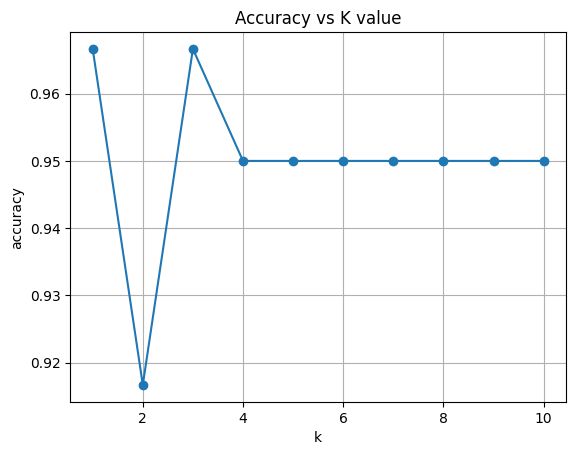

Best K value based on accuracy is:1
confusion matrix:
 [[24  0  0]
 [ 0 17  0]
 [ 0  2 17]]


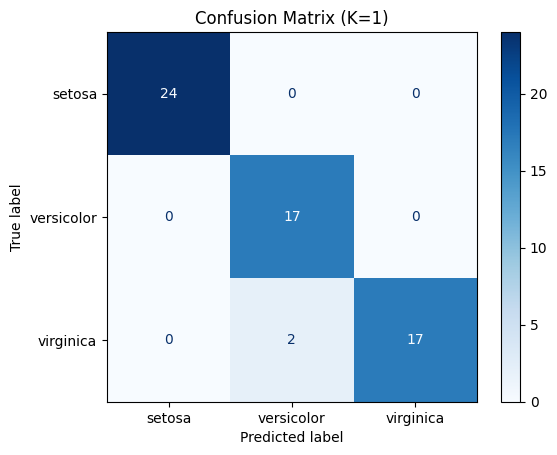

In [14]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
#loading dataset
dataset=load_iris()
X=dataset.data        
y=dataset.target      
#normalizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)
#splitting dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)
#different K values
accuracy=[]
for k in range(1,11):  
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    p=model.predict(X_test)
    acc=accuracy_score(y_test,p)
    accuracy.append(acc)
    print(f"K={k} and Accuracy={acc:.2f}")
#plot K values vs accuracy to find the best K visually
plt.plot(range(1,11),accuracy,marker='o')
plt.title("Accuracy vs K value")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()
#identify the best k with highest accuracy
best_k=accuracy.index(max(accuracy))+1
print(f"Best K value based on accuracy is:{best_k}")
#train  model using the best k value
final_model=KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train,y_train)
final_prediction=final_model.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,final_prediction)
print("confusion matrix:\n",cm)
#visualize  confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dataset.target_names).plot(cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()
